In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# read the data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test  = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def missing(df, name=""):
    null = df.isna().sum() 
    percentage = df.isna().mean().round(2) 
    out = pd.DataFrame({"missing": null, "missing_percentage": percentage})
    print("Missing summary -", name)
    return out[out.missing > 0].sort_values("missing", ascending=False)

missing(train, "train")


Missing summary - train


,missing,missing_percentage
Cabin,687,0.77
Age,177,0.20
Embarked,2,0.00


In [6]:
missing(test, "test")

Missing summary - test


,missing,missing_percentage
Cabin,327,0.78
Age,86,0.21
Fare,1,0.00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis =1)
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
test_id = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [10]:
# fill missisng values
age_median = train["Age"].median()
train["Age"] = train["Age"].fillna(age_median)
test["Age"] = test["Age"].fillna(age_median)

embarked_mode = train["Embarked"].mode()[0]
train["Embarked"] = train["Embarked"].fillna(embarked_mode)
test["Embarked"] = test["Embarked"].fillna(embarked_mode)

fare_median = train["Fare"].median()
test["Fare"] = test["Fare"].fillna(fare_median)

In [11]:
train.isnull().sum()
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

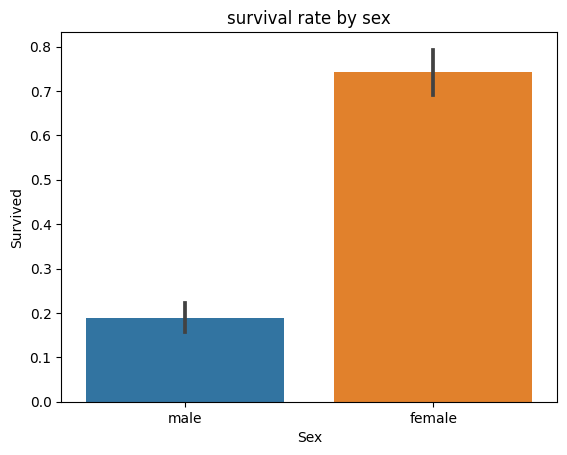

In [12]:
# plot
# survived by sex
sns.barplot(data=train, x="Sex", y = "Survived")
plt.title("survival rate by sex")
plt.show()

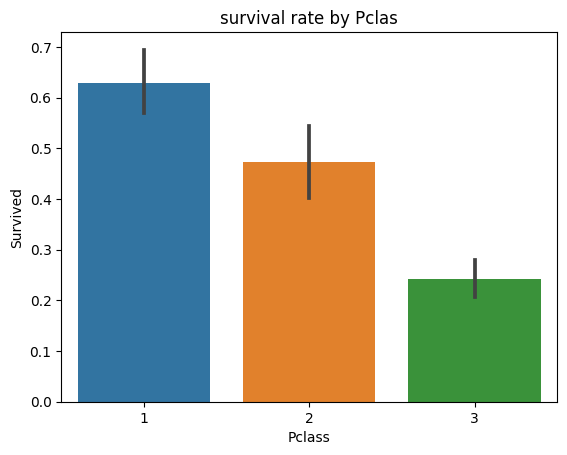

In [13]:
# survived by pclass
sns.barplot(data=train, x="Pclass", y="Survived")
plt.title("survival rate by Pclas")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


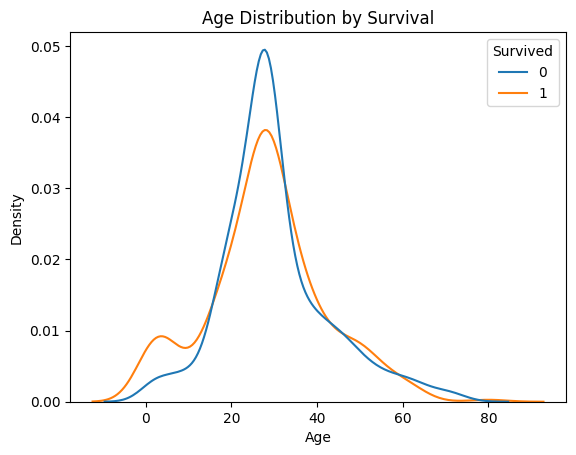

In [14]:
# Age distribution by survival
sns.kdeplot(data=train, x="Age", hue="Survived", common_norm=False)
plt.title("Age Distribution by Survival")
plt.show()

In [15]:
train = pd.get_dummies(train, drop_first=True)
test= pd.get_dummies(test, drop_first=True)

In [16]:
train, test = train.align(test, join="left", axis=1, fill_value=0)

if "Survived" in test.columns:
    test = test.drop(columns=["Survived"])

x = train.drop("Survived", axis=1)
y = train["Survived"]

In [17]:
# import library for training model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((178, 8), (713, 8), (178,), (713,))

In [20]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.7980364656381487

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rfc = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Use the best model for prediction
best_rfc = grid_search.best_estimator_
y_pred_rfc = best_rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred_rfc))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

In [22]:
pred = grid_search.predict(test)

submission = pd.DataFrame({
    "PassengerId": test_id, 
    "Survived": pred
})

submission.to_csv("submission.csv", index=False)